# Hand Digit Signs Classification

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers as tfl

import h5py

%matplotlib inline
np.random.seed(1)

In [11]:
# load data
train_dataset = h5py.File('data/train_signs.h5', 'r')
X_train_orig = np.array(train_dataset['train_set_x'][:])
Y_train_orig = np.array(train_dataset['train_set_y'][:])

test_dataset = h5py.File('data/test_signs.h5', 'r')
X_test_orig = np.array(test_dataset['test_set_x'][:])
Y_test_orig = np.array(test_dataset['test_set_y'][:])

classes = np.array(test_dataset['list_classes'][:])

Y_train_orig = Y_train_orig.reshape((1, Y_train_orig.shape[0]))
Y_test_orig = Y_test_orig.reshape((1, Y_test_orig.shape[0]))

label = 2


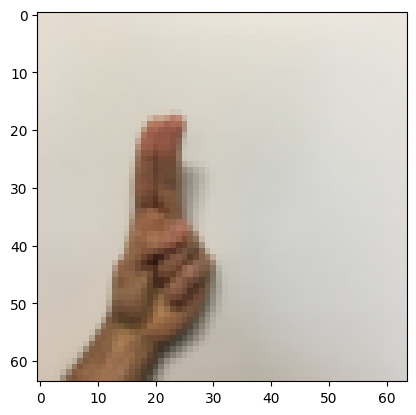

In [22]:
# show example
index = 10
plt.imshow(X_train_orig[index])
print('label = ' + str(np.squeeze(Y_train_orig[:, index])))

In [23]:
# normalize data
X_train = X_train_orig / 255.
X_test = X_test_orig / 255.
print(X_train.shape)
print(X_test.shape)

(1080, 64, 64, 3)
(120, 64, 64, 3)


In [42]:
Y_train = np.eye(6)[Y_train_orig.reshape(-1)]
Y_test = np.eye(6)[Y_test_orig.reshape(-1)]
print(Y_train.shape)
print(Y_test.shape)

(1080, 6)
(120, 6)


In [44]:
# build model
inputs = tfl.Input(shape=(64, 64, 3))
Z1 = tfl.Conv2D(filters=8, kernel_size=4, strides=1, padding='same')(inputs)
A1 = tfl.ReLU()(Z1)
P1 = tfl.MaxPool2D(pool_size=4, strides=4, padding='same')(A1)
Z2 = tfl.Conv2D(filters=16, kernel_size=2, strides=1, padding='same')(P1)
A2 = tfl.ReLU()(Z2)
P2 = tfl.MaxPool2D(pool_size=4, strides=4, padding='same')(A2)
F = tfl.Flatten()(P2)
outputs = tfl.Dense(units=6, activation='softmax')(F)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [45]:
# compile moel
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train model